In [9]:
pip install imbalanced-learn xgboost

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ahsan81/hotel-reservations-classification-dataset")

print("Path to dataset files:", path)

100%|██████████| 480k/480k [00:00<00:00, 74.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ahsan81/hotel-reservations-classification-dataset/versions/1


In [2]:
import os

os.listdir(path)

['Hotel Reservations.csv']

In [3]:
import pandas as pd


df = pd.read_csv(os.path.join(path, "Hotel Reservations.csv"))
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [5]:
df.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [10]:
from collections import Counter

Counter(df["booking_status"])

Counter({'Not_Canceled': 24390, 'Canceled': 11885})

In [31]:
df_draft = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder, RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, fbeta_score, make_scorer
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, KMeansSMOTE, RandomOverSampler, SMOTEN, SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour, EditedNearestNeighbours, RepeatedEditedNearestNeighbours
from imblearn.combine import SMOTEENN, SMOTETomek


def remove_class(df, class_name):
    X = df.drop(class_name, axis=1)
    y = df[class_name]
    return X, y

def split_data(X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, shuffle=True, stratify=y_val, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

def evaluate(pipe, X, y):
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
    scorer = make_scorer(fbeta_score, beta=2)
    scores = cross_val_score(pipe, X, y, scoring=scorer, cv=cv, n_jobs=-1)
    return scores.mean(), scores.std()

def create_pipeline(model, X, y, technique=None):

    num_cols = X.select_dtypes(include=['int64', 'float64']).columns
    cat_cols = pd.DataFrame(y).select_dtypes(include=['bool', 'object', 'category']).columns

    columns_transformer = ColumnTransformer(
        transformers=[('num',
                       Pipeline([
                          #('imputer', SimpleImputer(strategy='median')),
                          ('scaler', RobustScaler())
                       ]), num_cols),
                      ('cat',
                       Pipeline([
                          #('imputer', SimpleImputer(strategy='most_frequent')),
                          ('encoder', OneHotEncoder(handle_unknown='ignore'))
                       ]), cat_cols)]
        )

    if technique:
      return ImbPipeline(steps=[('preprocessor', columns_transformer), ('technique', technique), ('model', model)])
    else:
      return Pipeline(steps=[('preprocessor', columns_transformer), ('model', model)])

def retrieve_models():
  models = {
      'Logistic Regression': LogisticRegression(),
      'Decision Tree': DecisionTreeClassifier(),
      'Random Forest': RandomForestClassifier(),
      'AdaBoost': AdaBoostClassifier(),
      'Gradient Boosting': GradientBoostingClassifier(),
      'SVC': SVC(),
      'LDA': LinearDiscriminantAnalysis(),
      'XGBoost': XGBClassifier()
  }
  return models

def retrieve_techniques():
  techniques = {
      'SMOTE': SMOTE(),
      'Random Under Sampling': RandomUnderSampler(),
      'ADASYN': ADASYN(),
      'BorderlineSMOTE': BorderlineSMOTE(),
      'KMeansSMOTE': KMeansSMOTE(),
      'RandomOverSampler': RandomOverSampler(),
      'SMOTEN': SMOTEN(),
      'SVMSMOTE': SVMSMOTE(),
      'SMOTEENN': SMOTEENN()
  }
  return techniques

In [56]:
X, y = remove_class(df_draft, 'booking_status')

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)

models = retrieve_models()
techniques = retrieve_techniques()

In [75]:
results = []

for key, model in models.items():
  mean_score, std_score = evaluate(create_pipeline(model, X_train, y_train), X_train, y_train)
  results.append(mean_score)
  print(f'{key}: {mean_score} +/- {std_score}\n\n')

Logistic Regression: 0.8754422645056467 +/- 0.0035119952988281345


Decision Tree: 0.8807975686719618 +/- 0.0022025142411209006


Random Forest: 0.9292175562303839 +/- 0.003448296758013966


AdaBoost: 0.8749624007715986 +/- 0.0048171402001019915


Gradient Boosting: 0.9076419538362165 +/- 0.004538535325067501


SVC: 0.9070504892894687 +/- 0.002435420967467587


LDA: 0.8782610914258122 +/- 0.0032474796526594523


XGBoost: 0.9220530620724785 +/- 0.002866871700237702




#📌 **Best Model Identified**

After evaluating multiple classification algorithms, **Random Forest** achieved the highest performance based on the F2-Score:

- **Model:** Random Forest  
- **Average F2-Score:** 0.9292  
- **Standard deviation:** ± 0.0034  

This indicates that the model not only reaches a high level of performance, but also shows **consistent and stable results** across the different validations performed.


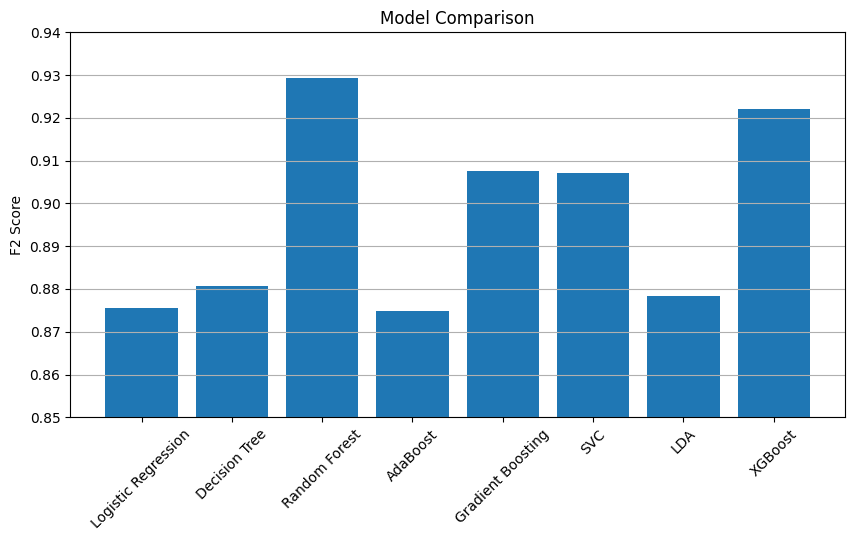

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(models.keys(), results)
plt.ylabel('F2 Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.ylim(0.85, 0.94)
plt.grid(axis='y')
plt.show()

In [78]:
results = []
model = RandomForestClassifier(
    n_estimators=200,          # Más árboles = más robustez (100-300 es común)
    max_depth=None,            # Permite que los árboles crezcan hasta que sea necesario
    min_samples_split=2,       # Mínimo de muestras para dividir un nodo
    min_samples_leaf=1,        # Mínimo de muestras en una hoja
    max_features='sqrt',       # Raíz cuadrada del número de features para cada split (bueno para clasificación)
    bootstrap=True,            # Usar muestreo con reemplazo (bagging)
    random_state=42,           # Para reproducibilidad
    n_jobs=-1,                 # Usa todos los núcleos disponibles
    verbose=1                  # Muestra progreso (opcional)
)

for key, technique in techniques.items():
  mean_score, std_score = evaluate(create_pipeline(model, X_train, y_train, technique), X_train, y_train)
  results.append(mean_score)
  print(f'{key}: {mean_score} +/- {std_score}\n\n')

SMOTE: 0.915033894366139 +/- 0.0030954227270403685


Random Under Sampling: 0.8813608090185961 +/- 0.0024874235434710836


ADASYN: 0.9038324494757966 +/- 0.0032651370037169837


BorderlineSMOTE: 0.9038717364560449 +/- 0.0037875241895851


KMeansSMOTE: 0.9278145357376391 +/- 0.0030402246886624676


RandomOverSampler: 0.9167348169286755 +/- 0.003175660181320314


SMOTEN: 0.9077461211887763 +/- 0.002103026204334868


SVMSMOTE: 0.9094770698663139 +/- 0.004069292564459646


SMOTEENN: 0.8719977251722191 +/- 0.0039511244438078345


SMOTETomek: 0.9144965716465503 +/- 0.0026005143685639506




KeyboardInterrupt: 

# 📌 **Best Sampling Technique Identified**

Among the different sampling techniques evaluated, **KMeansSMOTE** achieved the best performance in terms of the F2-Score:

- **Technique:** KMeansSMOTE  
- **Average F2-Score:** 0.9278  
- **Standard deviation:** ± 0.0030  

This indicates that using KMeansSMOTE provides both **high and consistent performance** across the validation folds, making it the most effective sampling method for this classification task.


In [80]:
model = RandomForestClassifier(
    n_estimators=200,          # Más árboles = más robustez (100-300 es común)
    max_depth=None,            # Permite que los árboles crezcan hasta que sea necesario
    min_samples_split=2,       # Mínimo de muestras para dividir un nodo
    min_samples_leaf=1,        # Mínimo de muestras en una hoja
    max_features='sqrt',       # Raíz cuadrada del número de features para cada split (bueno para clasificación)
    bootstrap=True,            # Usar muestreo con reemplazo (bagging)
    class_weight='balanced',   # Ajusta los pesos de las clases para compensar el desequilibrio
    random_state=42,           # Para reproducibilidad
    n_jobs=-1,                 # Usa todos los núcleos disponibles
    verbose=1                  # Muestra progreso (opcional)
)
mean_score, std_score = evaluate(create_pipeline(model, X_train, y_train), X_train, y_train)
print(f'Class weight balanced: {mean_score} +/- {std_score}\n\n')

Class weight balanced: 0.9291309776765497 +/- 0.002915215171010035




# 📌 **Class Weight Balancing Outperforms SMOTE**

Instead of using SMOTE or other sampling techniques, applying the `class_weight='balanced'` parameter led to the best performance with the CondensedNearestNeighbour model:

- **Strategy:** Class weight balancing (`class_weight='balanced'`)
- **Model:** CondensedNearestNeighbour  
- **Average F2-Score:** 0.9291  
- **Standard deviation:** ± 0.0029  

This indicates that for this dataset, simply leveraging class weight balancing produced **better and more consistent results** than traditional sampling methods.

In [81]:
model = RandomForestClassifier(
    n_estimators=200,          # Más árboles = más robustez (100-300 es común)
    max_depth=None,            # Permite que los árboles crezcan hasta que sea necesario
    min_samples_split=2,       # Mínimo de muestras para dividir un nodo
    min_samples_leaf=1,        # Mínimo de muestras en una hoja
    max_features='sqrt',       # Raíz cuadrada del número de features para cada split (bueno para clasificación)
    bootstrap=True,            # Usar muestreo con reemplazo (bagging)
    class_weight='balanced',   # Ajusta los pesos de las clases para compensar el desequilibrio
    random_state=42,           # Para reproducibilidad
    n_jobs=-1,                 # Usa todos los núcleos disponibles
    verbose=1                  # Muestra progreso (opcional)
)

pipeline = create_pipeline(model, X_train, y_train)
pipeline.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   13.2s finished


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  RangeIndex(start=0, stop=0, step=1))])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, n_jobs=-1,
                                        random_state=42, verbose=1))])

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.2s finished



--- Validation Set Results ---
F2-Score: 0.9405

Confusion Matrix:
[[ 926  262]
 [ 118 2321]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1188
           1       0.90      0.95      0.92      2439

    accuracy                           0.90      3627
   macro avg       0.89      0.87      0.88      3627
weighted avg       0.89      0.90      0.89      3627



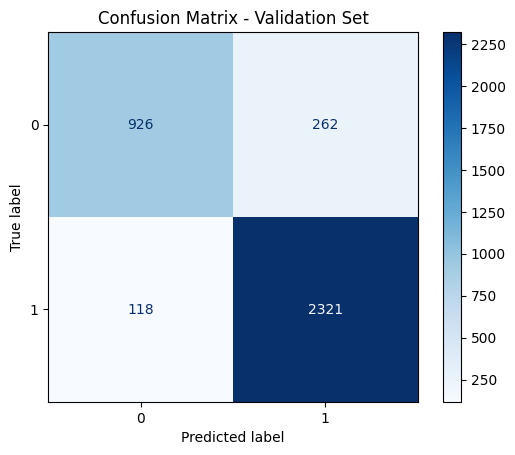

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.2s finished



--- Test Set Results ---
F2-Score: 0.9396

Confusion Matrix:
[[ 954  235]
 [ 127 2312]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1189
           1       0.91      0.95      0.93      2439

    accuracy                           0.90      3628
   macro avg       0.90      0.88      0.88      3628
weighted avg       0.90      0.90      0.90      3628



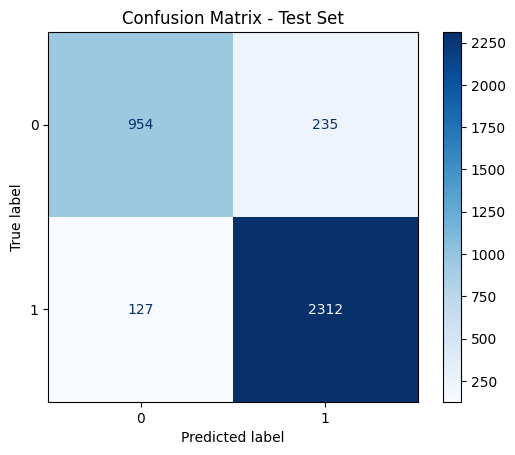

In [82]:
from sklearn.metrics import fbeta_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate_and_show_results(pipeline, X, y, set_name='Validation'):
    # Predict
    y_pred = pipeline.predict(X)
    # F2-score
    f2 = fbeta_score(y, y_pred, beta=2)
    print(f"\n--- {set_name} Set Results ---")
    print(f"F2-Score: {f2:.4f}\n")
    # Matrix
    cm = confusion_matrix(y, y_pred)
    print("Confusion Matrix:")
    print(cm)
    # Report
    print("\nClassification Report:")
    print(classification_report(y, y_pred))
    # Visualization
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {set_name} Set')
    plt.show()

# Eval validation set
evaluate_and_show_results(pipeline, X_val, y_val, set_name='Validation')

# Eval test set
evaluate_and_show_results(pipeline, X_test, y_test, set_name='Test')

## Conclusion

The Random Forest model, configured with `class_weight='balanced'`, demonstrated **excellent performance** on the Hotel Reservations dataset, which has a moderate class imbalance (approximately 67% Not_Canceled vs. 33% Canceled). The model achieved a high F2-Score and recall for the "Canceled" class, with consistently strong results across both validation and test sets. The confusion matrices confirm that false negatives and false positives remain low, indicating that the model can reliably distinguish between canceled and not canceled bookings.

Given these results, the selected approach is **robust and well-suited** for this problem. There is no need for additional resampling techniques, as the class_weight strategy alone delivers high, stable performance and excellent generalization. This model is therefore appropriate for deployment or further business analysis regarding hotel reservation cancellations.
